In [1]:
# 통계 기반의 텍스트 처리 기법 

#말뭉치 전처리 예제
text = "You say goodbye and I say hello."

#단어 단위로 자르기 위한 순서
#1) 모든 글자를 소문자로
text = text.lower()

#2) 띄어쓰기 기준으로 구분하기 위해 온점을 한칸 띄우기
text = text.replace('.', ' .')

In [2]:
text

'you say goodbye and i say hello .'

In [3]:
#띄어쓰기 기준으로 문장을 단어로 구분하기
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [4]:
#정규표현식을 이용한 범용적인 방법
import re

text = "You say goodbye and I say hello."

re.split(r'(\W+)', text)
    #re.split은 두번째 인자에 들어가는 문자안에서 첫번째 인자를 기준으로 문자들을 구분하여 리스트로 반환하는 기능을 제공한다
    # \W는 문자나 숫자가 아닌 문자열들을 찾는 기능을 담당한다
    # 공백이나 온점 . 는 숫자나 문자가 아닌 문자열이므로 \W에 해당한다
    # 마지막으로 +를 이용하여 한개이상의 공백이나 온점이 존재할경우를 기준점으로 삼도록한다

['You',
 ' ',
 'say',
 ' ',
 'goodbye',
 ' ',
 'and',
 ' ',
 'I',
 ' ',
 'say',
 ' ',
 'hello',
 '.',
 '']

In [5]:
#단어 정수인덱싱 작업
word_to_id = {} #키가 단어이고 값이 정수인덱싱을 담은 딕셔너리 객체
id_to_word = {} #키가 정수인덱싱, 값이 단어인 딕셔너리 객체

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id #키는 단어고 값은 정수 인덱싱 번호, 딕셔너리는 []인덱싱에 키를 사용해서 값을 찾거나 입력할 수 있다
        #또 키가 존재하지 않는다면 []로 키를 입력하고 그에 해당하는 값을 할당할 수 있단
        id_to_word[new_id] = word #키는 정수인덱싱 번호, 값은 단어

In [6]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [7]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [8]:
#정수 인덱싱으로 단어를 검색하는 경우
id_to_word[1]

'say'

In [9]:
#단어로 정수인덱싱을 검색하는 경우
word_to_id['hello']

5

In [10]:
#단어list를 정수인덱싱 리스트로 변환하기
import numpy as np

corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [11]:
#텍스트 전처리 + 정수 인덱싱 + 단어id 리스트 반환 사용자정의 함수 만들기
#mh_common의 mh_utils.py에 작성함

from mh_common.mh_utils import preprocess

corpus, word_to_id, id_to_word = preprocess(text)

In [12]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [13]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [14]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

## 분포가설
- 단어의 의미를 파악하기 위해 사용되는 통계적 기법들의 기본적인 가설
- 어떤 단어의 의미는 주변에 있는 단어들의 **맥락**속에서 생성된다
- 여기서 맥락은 기준 단어 주변에 존재하는 단어들
- 맥락에 해당하는 단어들의 개수는 사용자가 설정하는 하이퍼 파라미터인 **윈도우 크기**에 따라서 결정
- 윈도우 크기가 2일 경우 기준 단어를 바탕으로 좌, 우 2개의 단어를 맥락으로 취급한다

## 동시발생 행렬
- 분포가설에 기반해서 corpus를 분석할 때 어떤 단어 주변에 등장하는 단어들의 등장 빈도를 셀 수 있다
- 이렇게 해서 생성된 행렬을 **동시발생 행렬**이라고 한다

In [15]:
#윈도우 크기가 1인 경우의 동시발생 행렬

C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]   
])

In [16]:
C

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [17]:
#create_co_matrix 를 mh_utils.py에 작성
from mh_common.mh_utils import create_co_matrix

create_co_matrix(corpus, len(id_to_word), 1)

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

## 벡터간 유사도 (코사인 유사도)

## $similarity(x,y) = \frac{xy}{\|x\|\|y\|}$
- 분자는 두 벡터의 내적
- 분모는 두 벡터의 L2-norm 값의 곱
- 코사인 유사도는 두 벡터의 방향이 얼마나 같은지를 나타내는 수치
- 1에 가까울수록 두 벡터의 방향이 같고
- -1에 가까울수록 두 벡터의 방향이 반대이다

In [1]:
#코사인 유사도 산출 함수

def cos_similarity(x, y):
    nx = x / np.sqrt(np.sum(x**2))
    ny = y / np.sqrt(np.sum(y**2))
    return np.dot(nx, ny)

In [2]:
#그런데 만약 인자 x, y중 0 벡터가 들어오면
#0으로 나누는작업을 실행불가
#따라서 이를 보완하기 위한 매우 작은수를 더해주는 작업 필요
#mh_utils안에 cos_silmilarity 함수 작성함

In [4]:
#you 와 i의 유사도를 구하기
from mh_common.mh_utils import preprocess, create_co_matrix, cos_similarity

text = "You say goodbye and I say hello."

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)

C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]

In [7]:
print(cos_similarity(c0, c1))
    #i 와 you의 코사인유사도가 약 0.7로 나타남

0.7071067758832467


In [2]:
#검색엔진을 구현해보자
#어떤 단어가 들어올 때 검색단어와 유사한 단어들을 
#코사인 유사도가 높은순으로 출력하는 함수

#you와 유사도가 높은 단어들을 출력하는 작업을 실시

from mh_common.mh_utils import preprocess, create_co_matrix, cos_similarity, most_similar

text = "You say goodbye and I say hello."

corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(id_to_word)

C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top = 5)
    #여기서 등장하는 유사도를 엄밀히 말하자면
    #동시행렬 속 행에 해당하는 단어를 둘러싼 단어들의 출현횟수를 바탕으로 산출된것
    #즉 query로 질의한 단어와 유사도가 높은 단어들은
    #query단어를 구성하는 맥락 단어들을 많이 공유한다는 것


[query] you
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 hello: 0.7071067758832467
 say: 0.0
 and: 0.0


## 빈도 기반의 모델 보완하기
## -> 확률의 개념을 도입하기 
- 단순 빈도 기반의 모델 속에서는 문장 내 자주 등장하는 단어들의 빈도가 높게 산출됨
- 따라서 어떤 단어의 유사도를 확인한다고 할 때 어떤 단어 전 후로 자주 등장하는 단어들이 높은 가중치를 가지게 된다
- 그러나 사실 자주 등장하는 단어가 중요한 의미를 가지는 경우는 적음
- 따라서 단순 빈도 기반의 데이터 이용을 넘어서는 표현기법 필요

## 점별 상호정보량 Pointwise Manual Information(PMI)
## $PMI(x,y) = log_{2}\frac{P(x,y)}{P(x)P(y)}$
- 분자는 x,y가 동시에 등장한 확률
- 분모는 개별 x,y가 등장한 확률의 곱

**동시 발생핼렬을 이용하여 식을 다시 표현하면 다음과 같다**
# $PMI(x,y) = log_{2}\frac{P(x,y)}{P(x)P(y)} = log_{2}\frac{\frac{C(x,y)}{N}}{\frac{C(x)}{N}\frac{C(y)}{N}} = log_{2}\frac{C(x,y)N}{C(x)C(y)}$

- 그런데 C(x,y), P(x,y)가 0이면 음의 무한대로 발산하므로 값이 출력되지 않는 문제가 발생
- 따라서 이를 보완한 PPMI 지표를 이용

## 양의 상호정보량 PPMI
## $PPMI = max(0, PMI(x,y))$

## 번외. TF-IDF 산출식

## $idf(d, t) = log(n/(df(t)+1)) + 1$
- n은 문서의 개수
- df(t)는 t단어의 출현횟수

In [3]:
C

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [5]:
import numpy as np
np.sum(C)

14

In [7]:
np.sum(C, axis = 0)

array([1, 4, 2, 2, 2, 2, 1])

In [2]:
#동시발생 행렬을 PPMI 행렬로 변환하기 
import numpy as np
from mh_common.mh_utils import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision = 3) #행렬의 소수점을 출력할 때 소수셋째점 자리까지 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


## PPMI의 문제점
- 동시발생 행렬과 다르게 실수형식으로 표현됨
- ppmi의 값이 높을수록 단어의 중요도가 높다는 것을 의미
- 즉 행 단어에 대응하는 맥락 단어들의 중요도를 알 수 있다
- 그러나 PPMI행렬의 차원은 등장하는 유일한 단어들의 개수와 같다
- 따라서 문서의 크기가 클수록 PPMI의 차원은 매우 커질 것
- 또한 PPMI는 희소행렬이므로 효율성의 문제가 발생

**-> 이를 보완하는 기법의 필요** 

## 차원축소
- 차원축소기법은 기존의 행렬의 차원을 축소하면서도
- 중요한 데이터의 손실을 최소화하는 축소된 행렬을 생성하는 기법
- 이 때 축소된 행렬은 기존의 희소행렬이 아닌 **밀집행렬**형태

## 특이값분해 SVD
- 실제로 사용할 기법은 Truncated SVD로 축소된 SVD기법을 사용할 것
- SVD를 통해서 U, S, Vt가 생성되는데 이 때 S는 원 행렬의 특이값을 나타낸 대각행렬
- 특이값이 큰 순서대로 S의 데이터들이 나열되어 있고
- 특이값은 곧 해당 축의 중요도를 나타내므로 
- 특이값이 큰 것들의 일부만을 사용하면 차원을 줄일 수 있다. n -> p

In [3]:
#특이값 분해 실시

U, S, V = np.linalg.svd(W)

In [4]:
print(C[0])
print(W[0])
print(U[0])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-1.110e-16  3.409e-01 -1.205e-01 -3.886e-16  0.000e+00 -9.323e-01
  8.768e-17]


In [6]:
#2차원으로 줄이고 싶을 때
print(U[0, :2])

[-1.110e-16  3.409e-01]


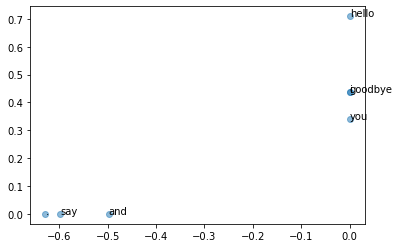

In [10]:
#단어들을 2차원 그래프에 표현하기
import matplotlib.pyplot as plt

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:, 0], U[:, 1], alpha = 0.5)
plt.show()

## PTB 데이터셋
- 텍스트 데이터 처리 모델의 품질을 측정하기 위한 영어 텍스트 자료
- PTB 데이터셋의 구조를 살펴보자 (우리가 지금까지 사용했던 preprocess 함수를 이용하여)

In [11]:
import sys
sys.path.append('C:/Users/myunghoon_k/OneDrive - 서울시립대학교/bitamin/dl_nlp_study/deep-learning-from-scratch-2-master')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

Done
말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [15]:
#PTB 데이터셋을 이용하여 통계기반 기법 평가
#과정은 다음과 같음
#1. 텍스트 데이를 전처리 하여 corpus 생성
#2. corpus 이용 동시발생 행렬 생성
#3. 동시발행 행렬 이용 PPMI행렬 생성
#4. PPMI행렬을 차원축소한 U행렬 생성
#5. U행렬 이용 단어들의 유사도 산출

from mh_common.mh_utils import most_similar, create_co_matrix, ppmi

window_size = 2 #맥락으로 참조할 주변 단어의 수
wordvec_size = 100 #축소된 차원(단어)의 수

corpus, word_to_id, id_to_word = ptb.load_data('train') #이과정안에 preprocess가 이미 포함되어 있음
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose = True)

print('calculating SVD ...')
try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components = wordvec_size, n_iter = 5,
                            random_state = None)
except ImportError:
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, :wordvec_size]

#검색할 단어들
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top = 5)
    #단어들을 검색하기 위해 참조되는 행렬이
    #바로 차원이 축소된 행렬 U

동시발생 수 계산 ...
PPMI 계산 ...


C:\Users\myunghoon_k\OneDrive - 서울시립대학교\bitamin\dl_nlp_study\mh_common\mh_utils.py:123: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[i]*S[j]) + eps)
C:\Users\myunghoon_k\OneDrive - 서울시립대학교\bitamin\dl_nlp_study\mh_common\mh_utils.py:123: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[i]*S[j]) + eps)


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
calculating SVD ...

[query] you
 i: 0.6643731594085693
 we: 0.6298354268074036
 somebody: 0.548122644424438